## Heart Disease Predictions using Supervised Machine Learning(Peterside Hospital)

- **This project aims to build a machine-learning model that can predict the likelihood of a person having a heart disease based on the given features.**


### 1. Import Libraries

In [1]:
# importing Libraries

# for Data Analysis
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for data pre processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

### 2. Load Dataset

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\akann\Documents\10ALYTICS\CASE STUDIES\PYTHON- PROJECTS\MACHINE LEARNING\SUPERVISED ML\HEART_case_Study\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Data Dictionary
The heart CSV dataset contains 303 records and 14
columns, including the target variable. The features include:
- age(in year),
- sex(1=male, 0= female),
- chest pain type (cp)(1: typical angina, 2: atypical angina, 3: non-angina pain, 4: asymptomatic),
- trestbps- resting blood pressure(in mmHg on admission to the hospital),
- chol- serum cholesterol in mg/dl,
- fbs- (fasting blood sugar>120mg/dl)(1= true; 0=false),
- restecg- resting electrocardiographic results,
- thalach- maximum heart rate achieved,
- exang- exercise-induced angina (1= true; 0= false),
- oldpeak- ST depression induced by exercise relative to rest,
- slope- the slope of the peak exercise ST segment,
- ca- number of major vessels(0-3 colored by flourosopy,
- thal(thalassemia)- 3= normal; 6= fixed defect; 7= reversible defect,
- target- have disease or not (1=yes, 0=no)

### 3. Exploratory Data Analysis

#### Renaming the columns for better understanding


In [3]:
# Renaming the columns for better understanding
df.columns= ['age','sex','chest_pain_type','resting_blood_pressure','cholesterol','fasting_blood_sugar','resting_ecg','max_heart_rate_achieved','exercise_induced_angina','st_depression','st_slope','num_major_vessels','thalassemia','target']
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Data verification: Verify Data types, number of features and rows.


In [4]:
# Data verification: Data types, number of features and rows.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   resting_ecg              303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

#### Check for missing values

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
resting_ecg                0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64


<Axes: >

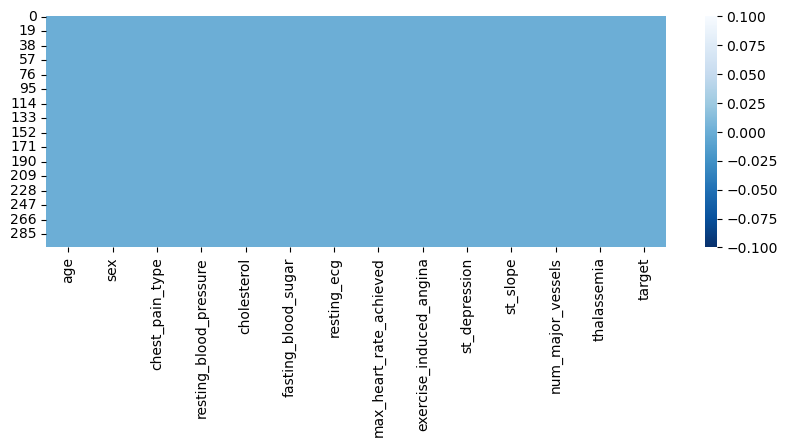

In [5]:
# checking for missing values
print(df.isnull().sum())

# visualizing missing values
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), cbar= True, cmap="Blues_r")

#### Statistical analysis

In [6]:
# statistical analysis of the data
df.describe()


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Univariate Analysis

In [7]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

#### Check for outliers

<Axes: xlabel='thalassemia'>

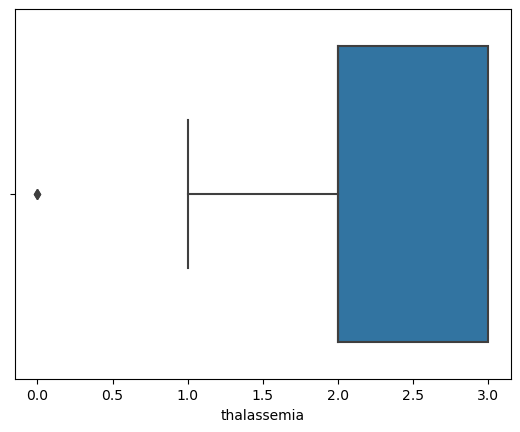

In [8]:
# Checking for outliers
sns.boxplot(x=df["thalassemia"])

- **This feature has a single outlier**

<Axes: xlabel='cholesterol'>

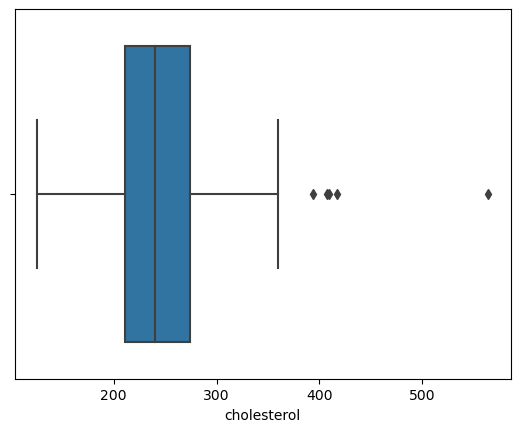

In [9]:
# Checking for outliers
sns.boxplot(x=df["cholesterol"])

- **This feature has multiple outliers**

<Axes: xlabel='resting_blood_pressure'>

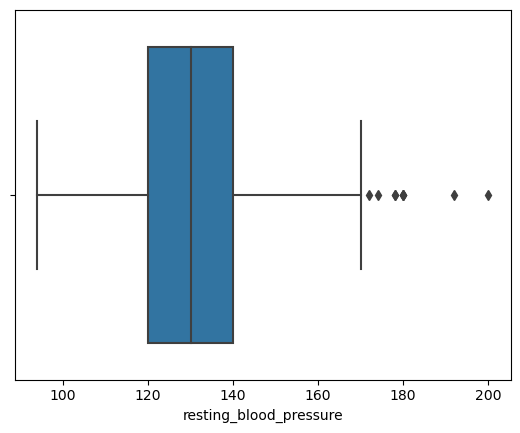

In [10]:
# Checking for outliers
sns.boxplot(x=df["resting_blood_pressure"])

- **This feature has multiple outliers**

<Axes: xlabel='max_heart_rate_achieved'>

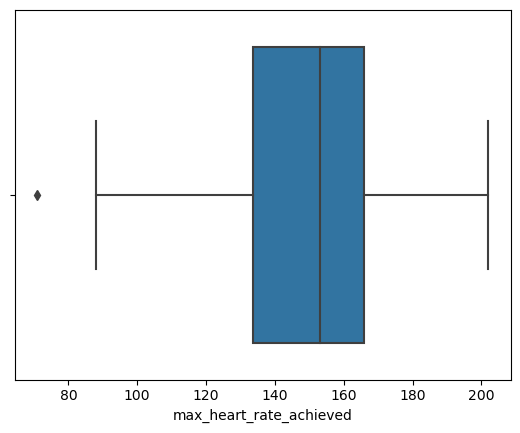

In [11]:
# Checking for outliers
sns.boxplot(x=df["max_heart_rate_achieved"])

- **This feature has a single outlier**

#### Building data transformer functions and visualizations

Text(0.5, 1.0, 'Total number of patients by Age group')

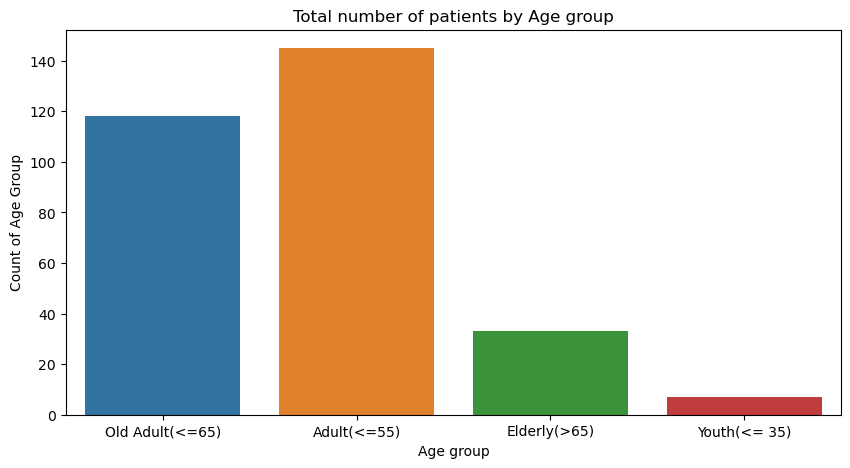

In [12]:
# Age bracket function
def age_bracket(age):
    if age <= 35:
        return "Youth(<= 35)"
    elif age<= 55:
        return "Adult(<=55)"
    elif age<= 65:
        return "Old Adult(<=65)"
    else :
        return "Elderly(>65)"
df['age_bracket'] = df['age'].apply(age_bracket)

# investigating age groups of patients
plt.figure(figsize=(10,5))
sns.countplot(x='age_bracket', data=df)
plt.xlabel('Age group')
plt.ylabel('Count of Age Group')
plt.title('Total number of patients by Age group')

- **Majority of the patients are from the Adult group and the least majority from the Youth Group**

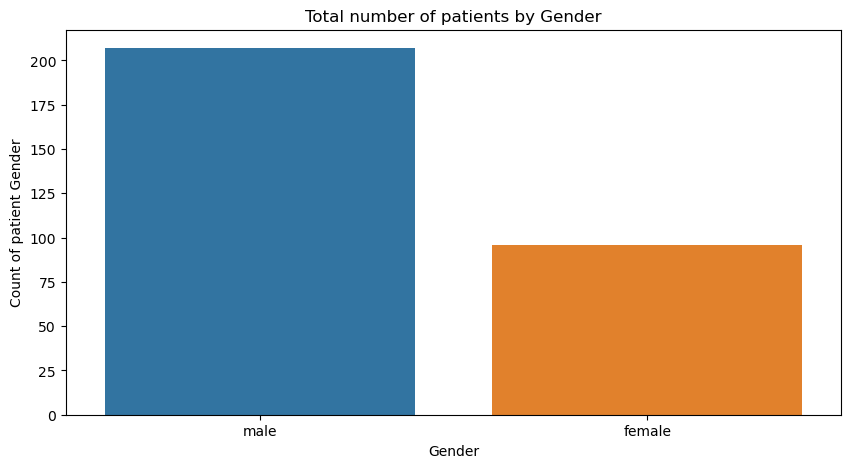

In [13]:
# Gender function
def gender(sex):
    if sex== 1:
        return 'male'
    else :
        return 'female'
        
df['gender'] =df['sex'].apply(gender)

# investigating gender of patients
plt.figure(figsize=(10,5))
sns.countplot(x='gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count of patient Gender')
plt.title('Total number of patients by Gender');

- **There are more male patients than female patients**

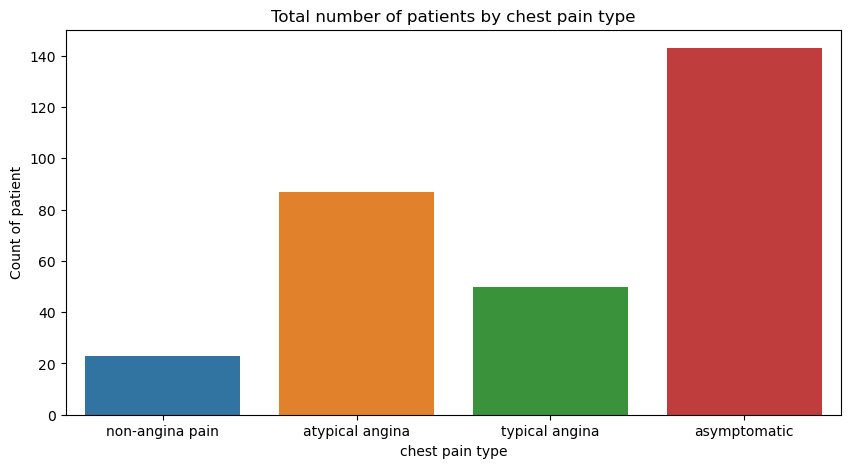

In [14]:
# Chest pain type function (1: typical angina, 2: atypical angina, 3: non-angina pain, 4: asymptomatic)
def chest_pain(cp):
    if cp== 1:
        return 'typical angina'
    elif cp== 2:
        return 'atypical angina'
    elif cp== 3:
        return 'non-angina pain'
    else:
        return 'asymptomatic'
df['cp_cat']= df['chest_pain_type'].apply(chest_pain)

# investigating chest pain category of patients
plt.figure(figsize=(10,5))
sns.countplot(x='cp_cat', data=df)
plt.xlabel('chest pain type')
plt.ylabel('Count of patient')
plt.title('Total number of patients by chest pain type');

- **Chest pain type labeled asymptomatic occured the most and non-angina pain occured the least**

Yes    165
No     138
Name: label, dtype: int64


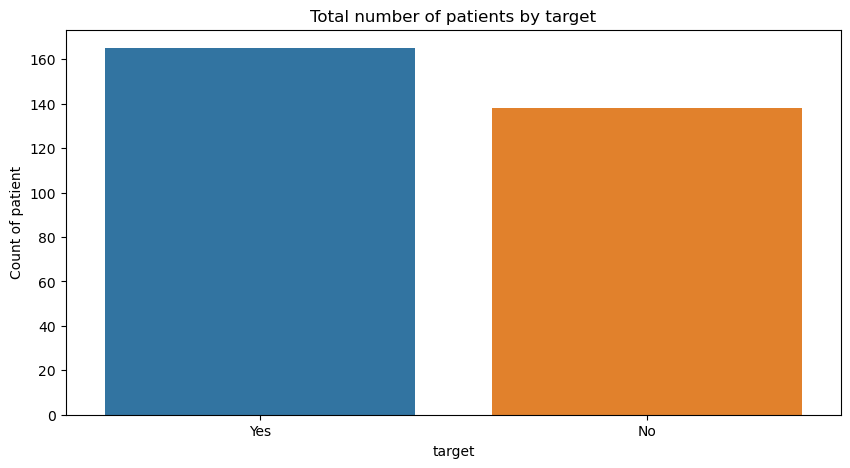

In [15]:
# Target function: Have Disease (1=yes, 0=NO)
def label(tg):
    if tg== 1:
        return 'Yes'
    else:
        return 'No'
df['label']= df['target'].apply(label)

# Total patients in each category
print(df['label'].value_counts())

# investigating chest pain type of patients
plt.figure(figsize=(10,5))
sns.countplot(x='label', data=df)
plt.xlabel('target')
plt.ylabel('Count of patient')
plt.title('Total number of patients by target');

- **From the data 165 patients have an heart disease and 138 don't have an heart disease**

#### Bivariate Analysis

#### Investigating Age group by Target feature

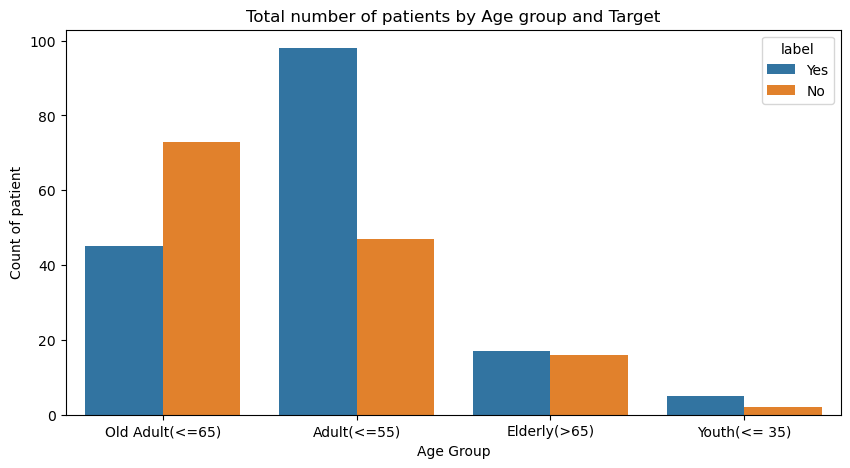

In [41]:
# Investigating Age group by Target feature
plt.figure(figsize=(10,5))
sns.countplot(x='age_bracket', data=df, hue='label')
plt.xlabel('Age Group')
plt.ylabel('Count of patient')
plt.title('Total number of patients by Age group and Target');

- **The age group labeled Adults have patients with the highest number of heart disease while the least is the Youth age group**

#### Investigating Gender by Target feature

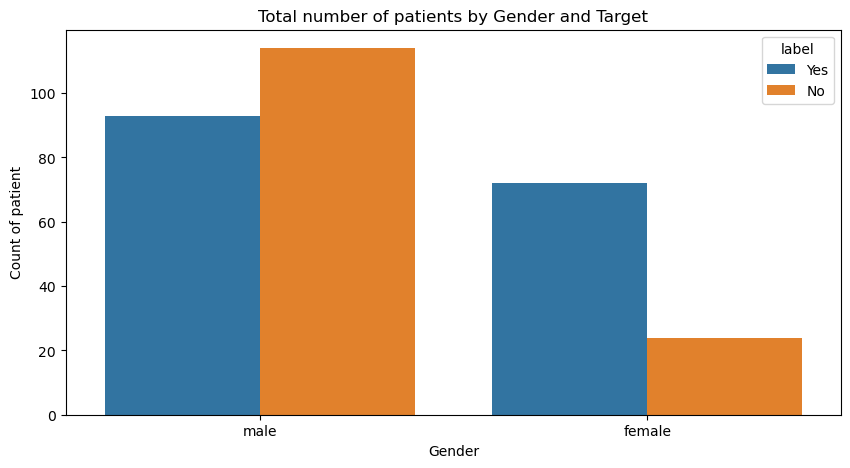

In [17]:
# Investigating Gender by Target feature
plt.figure(figsize=(10,5))
sns.countplot(x='gender', data=df, hue='label')
plt.xlabel('Gender')
plt.ylabel('Count of patient')
plt.title('Total number of patients by Gender and Target');

-  **Although male patients recorded a higher number of heart disease cases, female patients appear to be more prone from suffering a heart disease than males. From a self comparison there are more males WITHOUT an heart disease than those with heart disease while there are more females WITH heart disease than females without. The inequality in proportion seem to come from the fact that there are more male than female patients in the hospital**

#### Investigating Chest pain type by Target feature

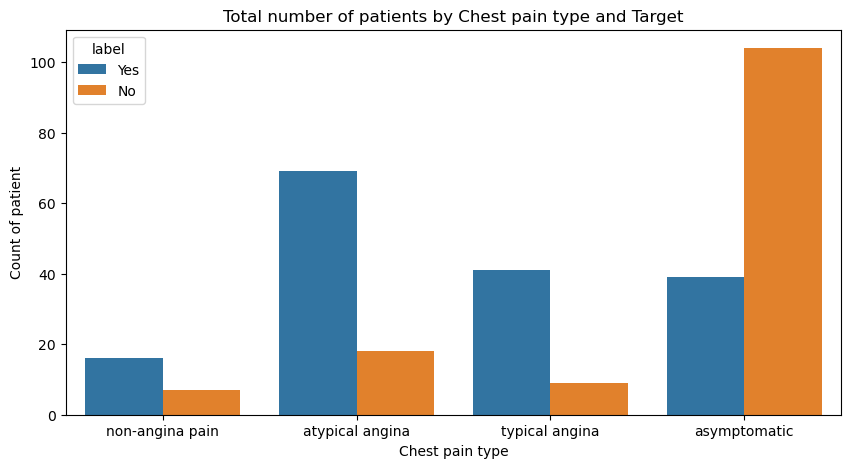

In [18]:
# Investigating Chest pain type by Target feature
plt.figure(figsize=(10,5))
sns.countplot(x='cp_cat', data=df, hue='label')
plt.xlabel('Chest pain type')
plt.ylabel('Count of patient')
plt.title('Total number of patients by Chest pain type and Target');

- **Patients with atypical angina have the highest risk of developing a heart disease followed by patients with typical angina, then the asymptomatic patients, and finally the non-angina patients**

### Multivariate Analysis

#### A correlation between the Target feature and other variables in the Dataset

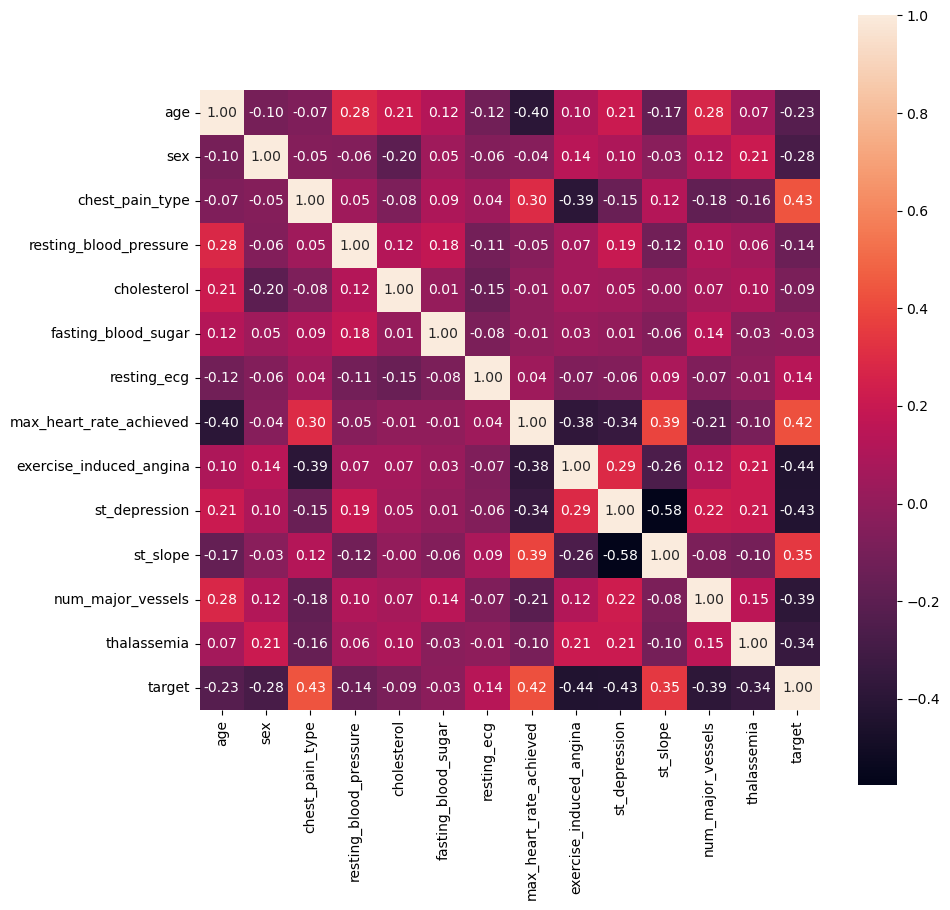

In [19]:
# Correlation between Target and other variables in the Dataset
plt.figure(figsize=(10,10))
hm= sns.heatmap(df.corr(), cbar=True, annot=True, square= True, fmt='.2f', annot_kws= {'size': 10})

- **There is a negative correlation between excercise induced angina,st depression, number of major blood vessels and the Target feature. Although the correlation isn't so strong it implies that as these variables increase the possibility of having an heart disease decreases.**
- **There is a positive correlation between chest pain type, maximum heart rate achieved and the Target feature. Although the correlation isn't so strong it implies that as these variables increase the possibility of having an heart disease increases too.**

### 4. Feature Engineering and Data Pre-Processing

#### Create a copy of the dataset (exclude the target feature and other redundant features)

In [20]:
# create a copy of the data(exclude target and other columns created)
df1= df[['age','sex','chest_pain_type','resting_blood_pressure','cholesterol','fasting_blood_sugar','resting_ecg','max_heart_rate_achieved','exercise_induced_angina','st_depression','st_slope','num_major_vessels','thalassemia']]

label =df[['target']]

In [21]:
df1.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
resting_ecg                  int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
dtype: object

#### Normalize data to deal with outliers

In [22]:
# Dealing with outliers - 'resting_blood_pressure','cholesterol','thalassemia'

# Normalize the data
scaler= MinMaxScaler()
df1['scaled_RBP']= scaler.fit_transform(df1['resting_blood_pressure'].values.reshape(-1,1))
df1['scaled_chol']= scaler.fit_transform(df1['cholesterol'].values.reshape(-1,1))
df1['scaled_thal']= scaler.fit_transform(df1['thalassemia'].values.reshape(-1,1))
df1['scaled_max_heart_rate']= scaler.fit_transform(df1['max_heart_rate_achieved'].values.reshape(-1,1))

df1.drop(['resting_blood_pressure','cholesterol','thalassemia','max_heart_rate_achieved'],axis= 1, inplace= True)
df1.head()

,age,sex,chest_pain_type,fasting_blood_sugar,resting_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,scaled_RBP,scaled_chol,scaled_thal,scaled_max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


### 5. Model Building

#### Split data into training and testing set

In [23]:
#split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(df1, label, test_size=0.2, random_state= 42)

#### Logistic Regression

In [24]:
# Model Building
# Logistic Regression
logreg= LogisticRegression()
logreg.fit(X_train, y_train)
ly_pred= logreg.predict(X_test)
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.8524590163934426
Precision: 0.8709677419354839
Recall: 0.84375
F1-score: 0.8571428571428571
AUC-ROC: 0.8529094827586207


- **An accuracy of 85.2% which means it correctly predicted the right answer 85% of the time.**
- **A precision score of 87.1% measures the proportion of true positive predictions among all positive predictions.**
- **A recall score of 84.3% measures the proportion of true positive predictions among all actual positive instances.**
- **An F1-score of 85.7% measures the harmonic mean of the Precision and Recall.**
- **An AUC-ROC score of 85.3% measures the true positive rate against the false positive rate.**

#### Create a confusion matrix for logistic regression

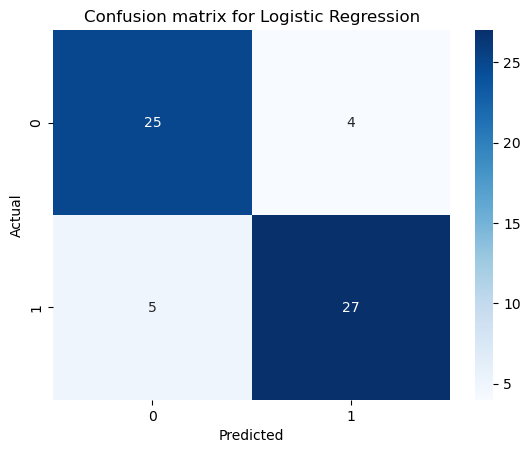

In [25]:
# Create a confusion matrix
# TRUE POSITIVE - correctly identifying individuals with heart disease
# FALSE POSITIVE - identifying individuals as having heart disease when they do not
# TRUE NEGATIVE - correctly identifying individuals without heart disease
# FALSE NEGATIVE - identifying individuals as not having heart disease when they do


lcm= confusion_matrix(y_test,ly_pred)

#visualize the confusion matrix
sns.heatmap(lcm, annot= True, cmap= 'Blues', fmt= 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Logistic Regression')
plt.show()

- **The model predicted 25 true negatives and 5 false negatives results.**
- **The model predicted 27 true positives and 4 false positives results.**

#### Applying 8 machine learning algorithms to the dataset at ONCE
(XGB Classifier, Random Forest, K-Nearest Neighbors, SGD Classifier, SVC, Naive Bayes, Decision Tree, Logistic Regression)

In [26]:
# Applying 8 machine learning algorithms to the dataset

classifiers = [[XGBClassifier(), 'XGB Classifier'],
               [RandomForestClassifier(), 'Random Forest'],
               [KNeighborsClassifier(), 'K-Nearest Neighbors'],
               [SGDClassifier(), 'SGD Classifier'],
               [SVC(), 'SVC'],
               [GaussianNB(),'Naive Bayes'],
               [DecisionTreeClassifier(random_state= 42), 'Decision Tree'],
               [LogisticRegression(), 'Logistic Regression']
              ]

In [27]:
accuracy_list= {}
precision_list= {}
recall_list= {}
roc_list= {}

for classifier in classifiers:
    model= classifier[0]
    model.fit(X_train, y_train)
    model_name= classifier[1]
    
    pred= model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    accuracy_list[model_name]= ([str(round(a_score*100,2))+ '%'])
    precision_list[model_name]= ([str(round(p_score*100,2))+ '%'])
    recall_list[model_name]= ([str(round(r_score*100,2))+ '%'])
    roc_list[model_name]= ([str(round(roc_score*100,2))+ '%'])
    
    
    if model_name != classifiers[-1][1]:
        print('')

### 6. Model Evaluation

In [28]:
print('Accuracy score')
s1= pd.DataFrame(accuracy_list)
s1.head()

Accuracy score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,81.97%,86.89%,75.41%,78.69%,65.57%,86.89%,85.25%,85.25%


In [29]:
print('Precision score')
s2= pd.DataFrame(precision_list)
s2.head()

Precision score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,86.21%,85.29%,79.31%,88.0%,65.71%,90.0%,92.59%,87.1%


In [30]:
print('recall score')
s3= pd.DataFrame(recall_list)
s3.head()

recall score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,78.12%,90.62%,71.88%,68.75%,71.88%,84.38%,78.12%,84.38%


In [31]:
print('ROC score')
s4= pd.DataFrame(roc_list)
s4.head()

ROC score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,82.17%,86.69%,75.59%,79.2%,65.25%,87.02%,85.61%,85.29%


**Top 3 performing classifiers:**

**1. Naive Bayes**

**2. Logisitic Regression**

**3. Random Forest**

#### Create a confusion matrix for Random forest classifier

In [39]:
rfc= RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred= rfc.predict(X_test)

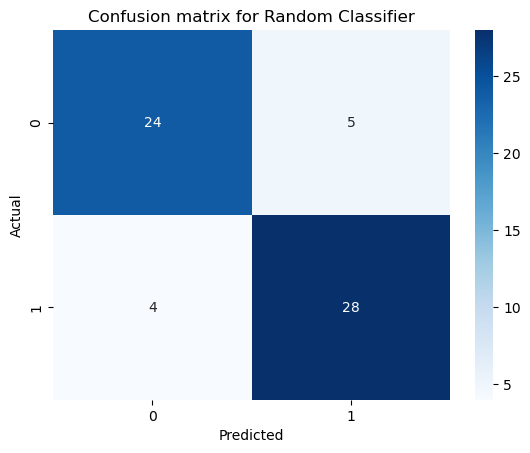

In [40]:
# Create a confusion matrix
rcm= confusion_matrix(y_test,rfy_pred)

#visualize the confusion matrix
sns.heatmap(rcm, annot= True, cmap= 'Blues', fmt= 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Random Classifier')
plt.show()

- **The model predicted 24 true negatives and 4 false negatives results**
- **The model predicted 28 true positives and 5 false positives results**

#### Create a confusion matrix for Naive Bayes classifier

In [34]:
gnb= GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred= gnb.predict(X_test)

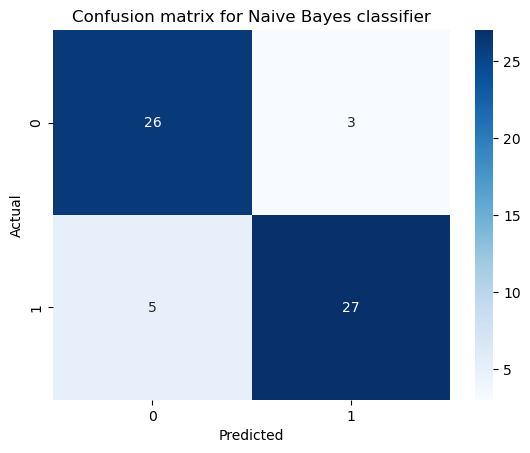

In [35]:
# Create a confusion matrix
gnbb= confusion_matrix(y_test,gnb_pred)

#visualize the confusion matrix
sns.heatmap(gnbb, annot= True, cmap= 'Blues', fmt= 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Naive Bayes classifier')
plt.show()

### 7. Conclusion: 
**Considering the sensitivity of this project, an ideal model will be one predicting low false negatives and high true positives which makes the Random Forest classifier the best model in this scenario.**